In [ ]:
!pip install mlxtend
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder



In [ ]:
dataset = [['milk', 'bread', 'butter'],
           ['bread', 'diapers', 'beer'],
           ['milk', 'diapers', 'bread', 'beer'],
           ['milk', 'bread', 'butter']]

# one-hot encoded DataFrame
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
df = pd.DataFrame(te_ary, columns=te.columns_)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# find frequent itemsets
frequent_itemsets = apriori(df, min_support=0.5, use_colnames=True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
# Generate the association rules
rules = association_rules(frequent_itemsets, metric="lift", min_threshold=1.0)

print(rules)

         antecedents       consequents  antecedent support  \
0             (beer)           (bread)                0.50   
1            (bread)            (beer)                1.00   
2          (diapers)            (beer)                0.50   
3             (beer)         (diapers)                0.50   
4           (butter)           (bread)                0.50   
5            (bread)          (butter)                1.00   
6          (diapers)           (bread)                0.50   
7            (bread)         (diapers)                1.00   
8             (milk)           (bread)                0.75   
9            (bread)            (milk)                1.00   
10          (butter)            (milk)                0.50   
11            (milk)          (butter)                0.75   
12   (diapers, beer)           (bread)                0.50   
13  (diapers, bread)            (beer)                0.50   
14     (beer, bread)         (diapers)                0.50   
15      

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


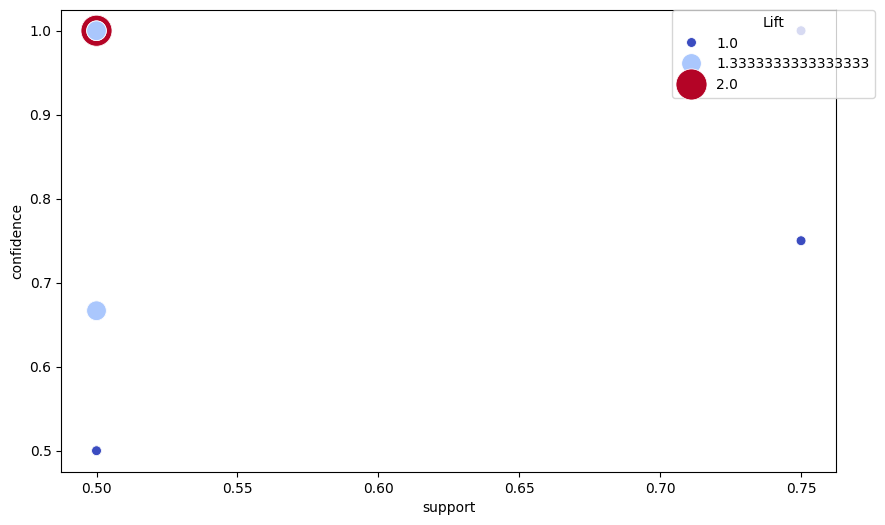

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
scatter = sns.scatterplot(x="support", y="confidence", size="lift", hue="lift", data=rules,
                          palette="coolwarm", sizes=(50, 500), legend="full")

scatter.legend(title='Lift', loc='upper right', bbox_to_anchor=(1.05, 1), borderaxespad=0)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


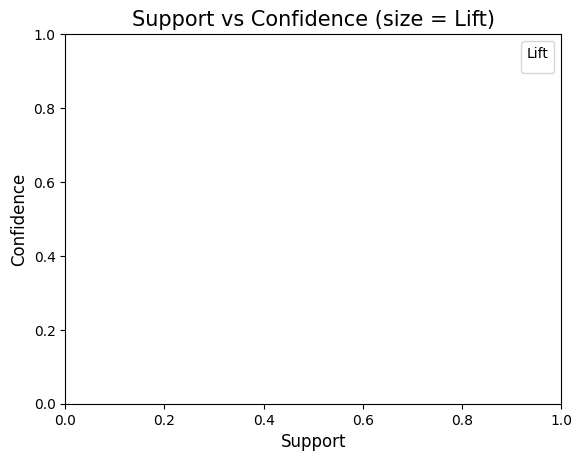

In [ ]:
# Add labels and title
plt.title('Support vs Confidence (size = Lift)', fontsize=15)
plt.xlabel('Support', fontsize=12)
plt.ylabel('Confidence', fontsize=12)
plt.legend(loc='upper right', title="Lift")

# Show plot
plt.show()